In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn
from imblearn.over_sampling import SMOTE
from collections import Counter

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

from sklearn.neighbors import  KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix
import pickle

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
cols = ['soil', 'nitrogen', 'phosphorus', 'potassium', 'pH', 'rainfall', 'temperature', 'crop', 'fertilizer']
df = pd.read_csv('fp3.csv', names=cols)
df.head()

,soil,nitrogen,phosphorus,potassium,pH,rainfall,temperature,crop,fertilizer
0,Black,75,50,100,6.5,1000,20,Sugarcane,Urea
1,Black,80,50,100,6.5,1000,20,Sugarcane,Urea
2,Black,85,50,100,6.5,1000,20,Sugarcane,Urea
3,Black,90,50,100,6.5,1000,20,Sugarcane,Urea
4,Black,95,50,100,6.5,1000,20,Sugarcane,Urea


In [3]:
soil_type_label_encoder = LabelEncoder()
df["soil"] = soil_type_label_encoder.fit_transform(df["soil"])

crop_type_label_encoder = LabelEncoder()
df["crop"] = crop_type_label_encoder.fit_transform(df["crop"])

In [4]:
croptype_dict = {}
for i in range(len(df["crop"].unique())):
    croptype_dict[i] = crop_type_label_encoder.inverse_transform([i])[0]
print(croptype_dict)

soiltype_dict = {}
for i in range(len(df["soil"].unique())):
    soiltype_dict[i] = soil_type_label_encoder.inverse_transform([i])[0]
print(soiltype_dict)



{0: 'Cotton', 1: 'Ginger', 2: 'Gram', 3: 'Grapes', 4: 'Groundnut', 5: 'Jowar', 6: 'Maize', 7: 'Masoor', 8: 'Moong', 9: 'Rice', 10: 'Soybean', 11: 'Sugarcane', 12: 'Tur', 13: 'Turmeric', 14: 'Urad', 15: 'Wheat'}
{0: 'Black', 1: 'Dark Brown', 2: 'Light Brown', 3: 'Medium Brown', 4: 'Red', 5: 'Reddish Brown'}


In [5]:
fertname_label_encoder = LabelEncoder()
df["fertilizer"] = fertname_label_encoder.fit_transform(df["fertilizer"])

In [6]:
fertname_dict = {}
for i in range(len(df["fertilizer"].unique())):
    fertname_dict[i] = fertname_label_encoder.inverse_transform([i])[0]
print(fertname_dict)



{0: '10:10:10 NPK', 1: '10:26:26 NPK', 2: '12:32:16 NPK', 3: '13:32:26 NPK', 4: '18:46:00 NPK', 5: '19:19:19 NPK', 6: '20:20:20 NPK', 7: '50:26:26 NPK', 8: 'Ammonium Sulphate', 9: 'Chilated Micronutrient', 10: 'DAP', 11: 'Ferrous Sulphate', 12: 'Hydrated Lime', 13: 'MOP', 14: 'Magnesium Sulphate', 15: 'SSP', 16: 'Sulphur', 17: 'Urea', 18: 'White Potash'}


In [7]:
X = df[df.columns[:-1]]
y = df[df.columns[-1]]



In [8]:
upsample = SMOTE()
X, y = upsample.fit_resample(X, y)
counter = Counter(y)
print(counter)

Counter({17: 1364, 10: 1364, 13: 1364, 1: 1364, 15: 1364, 14: 1364, 3: 1364, 2: 1364, 7: 1364, 5: 1364, 9: 1364, 4: 1364, 16: 1364, 6: 1364, 8: 1364, 11: 1364, 18: 1364, 0: 1364, 12: 1364})


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size = 0.1, random_state = 0)
print(f"Train Data: {X_train.shape}, {y_train.shape}")
print(f"Train Data: {X_test.shape}, {y_test.shape}")

Train Data: (23324, 8), (23324,)
Train Data: (2592, 8), (2592,)


Accuracy at k = 1 is 0.9756944444444444
Accuracy at k = 2 is 0.9756944444444444
Accuracy at k = 3 is 0.9753086419753086
Accuracy at k = 4 is 0.96875
Accuracy at k = 5 is 0.9675925925925926
Accuracy at k = 6 is 0.9571759259259259
Accuracy at k = 7 is 0.9575617283950617
Accuracy at k = 8 is 0.9479166666666666
Accuracy at k = 9 is 0.9456018518518519
Accuracy at k = 10 is 0.9363425925925926
Accuracy at k = 11 is 0.9344135802469136
Accuracy at k = 12 is 0.9263117283950617
Accuracy at k = 13 is 0.9239969135802469
Accuracy at k = 14 is 0.9185956790123457
Accuracy at k = 15 is 0.9182098765432098
Accuracy at k = 16 is 0.9104938271604939
Accuracy at k = 17 is 0.9074074074074074
Accuracy at k = 18 is 0.9031635802469136
Accuracy at k = 19 is 0.9035493827160493
Accuracy at k = 20 is 0.9012345679012346
Accuracy at k = 21 is 0.9020061728395061
Accuracy at k = 22 is 0.9004629629629629
Accuracy at k = 23 is 0.8923611111111112
Accuracy at k = 24 is 0.8892746913580247
Accuracy at k = 25 is 0.883487654320

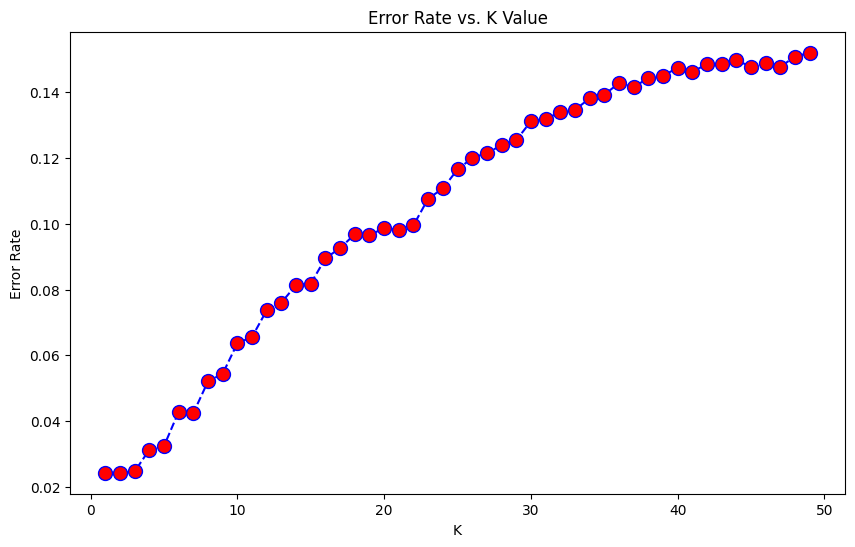

In [13]:
error_rate = []
for i in range(1, 50):
    pipeline = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors = i))
    pipeline.fit(X_train, y_train)
    predictions = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    print(f"Accuracy at k = {i} is {accuracy}")
    error_rate.append(np.mean(predictions != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed',
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

Accuracy on Test Data: 98.07%


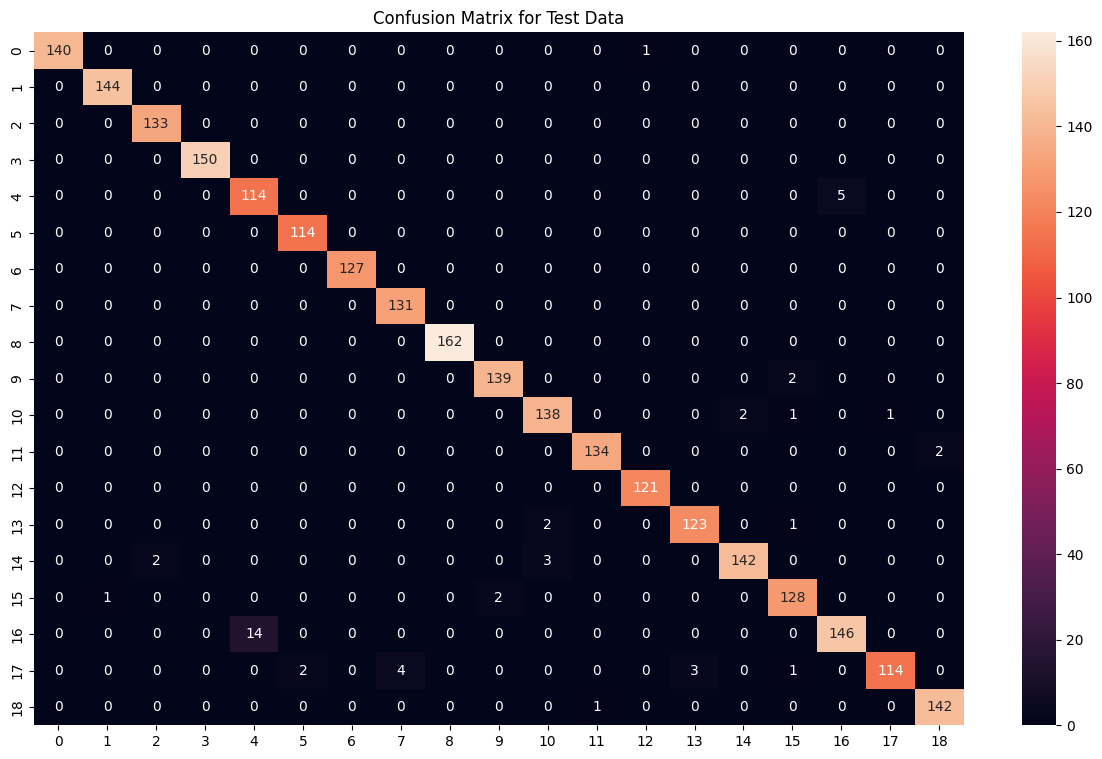

Accuracy on Whole Data: 99.34%


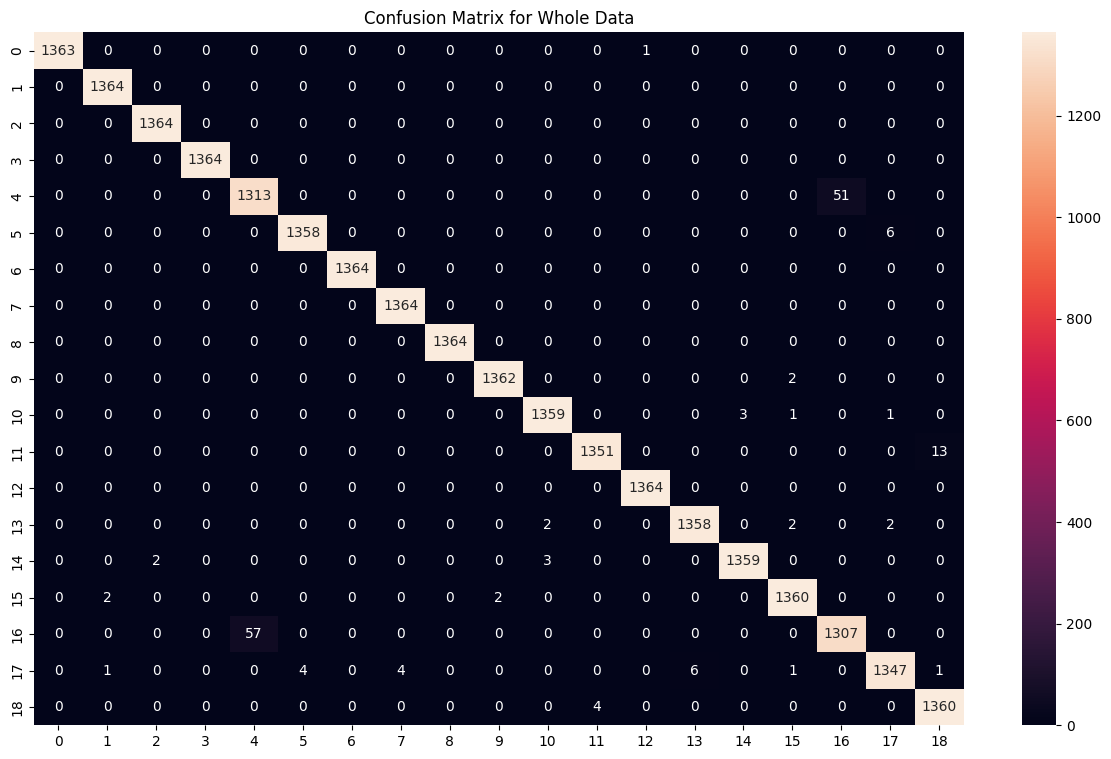

In [11]:
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_scaled = scaler.transform(X)

xgb_clf = XGBClassifier(random_state=18)
xgb_clf.fit(X_train_scaled, y_train)

predictions_test = xgb_clf.predict(X_test_scaled)
accuracy_test = accuracy_score(y_test, predictions_test)
print(f"Accuracy on Test Data: {accuracy_test * 100:.2f}%")
plt.figure(figsize=(15, 9))
sns.heatmap(confusion_matrix(y_test, predictions_test), annot=True, fmt='d')
plt.title("Confusion Matrix for Test Data")
plt.show()

predictions_whole = xgb_clf.predict(X_scaled)
accuracy_whole = accuracy_score(y, predictions_whole)
print(f"Accuracy on Whole Data: {accuracy_whole * 100:.2f}%")
plt.figure(figsize=(15, 9))
sns.heatmap(confusion_matrix(y, predictions_whole), annot=True, fmt='d')
plt.title("Confusion Matrix for Whole Data")
plt.show()


In [42]:
from joblib import dump

dump(xgb_clf, "xgboost_model.joblib")
print("Model saved as xgboost_model.joblib")


Model saved as xgboost_model.joblib


In [12]:
import joblib
joblib.dump(scaler, 'scaler.joblib')
print("Scaler saved")

Scaler saved
